In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, PillowWriter 
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
from matplotlib.patches import Patch

In [2]:
class GameOfLife:
    
    def __init__(self, filename):
        """
        Initializes the Conway’s Game of Life model by reading an initial grid state from a file.

        :param filename: Path to the txt file containing the initial grid configuration.
        :attribute grid: 2D numpy array representing the current state of the grid.
        attribute  stages: List to store snapshots of the grid at each step of the simulation.
        """
        self.grid = self.Read_intial_grid(filename)
        self.stages = [] 
        
        
    def Read_intial_grid(self, filename):
        """
        Reads the initial grid configuration from a specified file.
        
        :param filename: Path to the txt file containing the initial grid configuration.
                         Each cell is represented by '0' (dead) or '1' (alive).
        :return: 2D numpy array representing the initial grid state.
        """
        
        with open(filename, 'r') as file:
            grid = [[int(cell) for cell in line.strip().split(' ')] for line in file] # można też samo split 
        return np.array(grid)
    

    def living_neighbours(self, i, j):
        """
        Counts the number of alive neighbors for a given cell in the grid.
        
        :param i: Row index of the cell.
        :param j: Column index of the cell.
        :return: Count of living neighbors (values of 1) surrounding the cell at (i, j).
        """
        neighbours_count = 0
        rows, cols = self.grid.shape
        #print(rows, cols)

        for x in range(-1, 2):  # -1, 0, 1: iterating through the rows of neighbours
            for y in range(-1, 2):  # -1, 0, 1: iteration over the columns of the neighbours
                if x == 0 and y == 0:
                    continue  
                    
                # Periodic indexing - ensuring transition across edges
                neighbour_x = (i + x) % rows
                neighbour_y = (j + y) % cols

                if self.grid[neighbour_x, neighbour_y] == 1:
                    neighbours_count += 1

        return neighbours_count
    
    
    def update(self, steps=10):
        """
        Changes the state of the grid according to Conway's Game of Life rules:
        1.If a dead cell has exactly 3 living neighbors, it becomes alive (birth).
        2.If a living cell has 2 or 3 living neighbors, it remains alive (survival).
        3.Otherwise, a living cell dies due to underpopulation (fewer than 2 neighbors) 
        or overpopulation (more than 3 neighbors).
        
        :param steps: The number of steps to simulate.
        """
        for _ in range(steps):
            new_grid = self.grid.copy()
            rows, cols = self.grid.shape
            for i in range(rows):
                for j in range(cols):
                    live_neighbors = self.living_neighbours(i, j)
                    if self.grid[i, j] == 1:
                        if live_neighbors < 2 or live_neighbors > 3:
                            new_grid[i, j] = 0
                    else:
                        if live_neighbors == 3:
                            new_grid[i, j] = 1

            self.grid = new_grid
            self.stages.append(self.grid.copy())

    def animate(self, save_to_file=None):
        """
        Creates an animation of the Game of Life evolution
    
        :param save_to_file: If a string is provided, saves the animation to the file path;
                            otherwise, displays the animation interactively.
        """
 
        if not self.stages:
            print("No stages recorded. Please run update method first.")
            return

        fig, ax = plt.subplots(figsize=(10, 10))
        
        cmap = mcolors.ListedColormap(['cornsilk', 'hotpink'])
        num_rows, num_cols = self.grid.shape
    
        img = ax.imshow(self.stages[0], cmap=cmap, interpolation='none')

        ax.set_aspect('equal')
        ax.set_xticks(np.arange(0.5, num_cols + 0.5, 1))
        ax.set_yticks(np.arange(0.5, num_rows + 0.5, 1))
        ax.grid(color='burlywood', linestyle='-', linewidth=1)
        ax.tick_params(which='both', bottom=True, left=False, labelbottom=False, labelleft=False)

        from matplotlib.patches import Patch
        legend_elements = [Patch(facecolor='hotpink', edgecolor='grey', label='Alive'),
                        Patch(facecolor='cornsilk', edgecolor='grey', label='Dead')]
        ax.legend(handles=legend_elements, loc='upper right')
        
        def update_frame(frame):
            img.set_array(self.stages[frame])
            return [img]

        ani = animation.FuncAnimation(fig, update_frame, frames=len(self.stages), interval=500, blit=True)
        plt.title(f"Game of Life Simulation", size=16)

        if save_to_file:
            ani.save(save_to_file, PillowWriter(fps=5))
            print(f"Animation saved to file: {save_to_file}")
        else:
            plt.show()


# Left bottom - Blinker, Center - Glider, Right up - Beacon

Animation saved to file: Glider_animation.gif


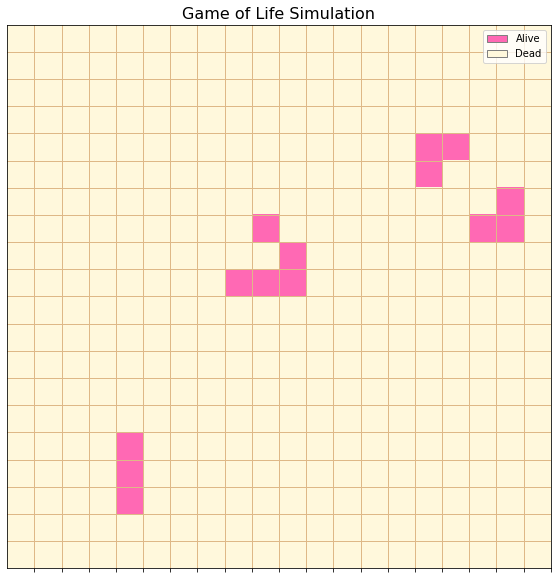

In [308]:
game = GameOfLife('Initial_grid_glider.txt')
game.update(100)
game.animate(save_to_file='Glider_animation.gif')

![Glider](Glider_animation.gif)

# Pulsar

Animation saved to file: Pulsar_animation.gif


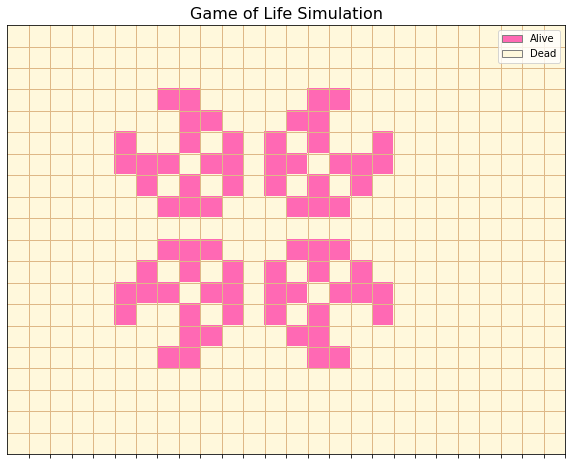

In [315]:
game = GameOfLife('pulsar.txt')
game.update(200)
game.animate(save_to_file='Pulsar_animation.gif')

![Pulsar](Pulsar_animation.gif)

# Puffer fish

Animation saved to file: Fish_animation.gif


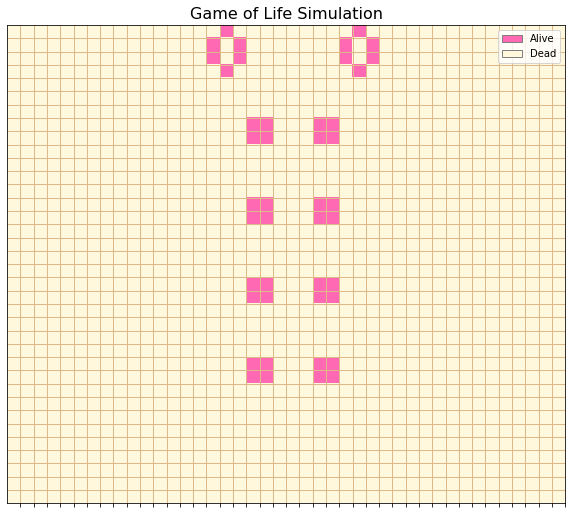

In [3]:
game = GameOfLife('puffer_Fish.txt')
game.update(300)
game.animate(save_to_file='Fish_animation.gif')

![Fish](Fish_animation.gif)